### Homework 2: Exploratory data analysis and visualization

UIC CS 418, Fall 2024

_According to the **Academic Integrity Policy** of this course, all work submitted for grading must be done individually, unless otherwise specified. While we encourage you to talk to your peers and learn from them, this interaction must be superficial with regards to all work submitted for grading. This means you cannot work in teams, you cannot work side-by-side, you cannot submit someone else’s work (partial or complete) as your own. In particular, note that you are guilty of academic dishonesty if you extend or receive any kind of unauthorized assistance. Absolutely no transfer of program code between students is permitted (paper or electronic), and you may not solicit code from family, friends, or online forums. Other examples of academic dishonesty include emailing your program to another student, copying-pasting code from the internet, working in a group on a homework assignment, and allowing a tutor, TA, or another individual to write an answer for you. Academic dishonesty is unacceptable, and penalties range from failure to expulsion from the university; cases are handled via the official student conduct process described at https://dos.uic.edu/conductforstudents.shtml._

This homework is an **individual assignment for all graduate students**. **Undergraduate students are allowed to work in pairs and submit one homework assignment per pair**. There will be no extra credit given to undergraduate students who choose to work alone. The pairs of students who choose to work together and submit one homework assignment together still need to abide by the Academic Integrity Policy and not share or receive help from others (except each other).

There are three parts in this homework. The first one is a practice introduction to `matplotlib` (5%). The second is a guided exploration of some divvy trip dataset (45%). The third one is a self-guided exploration of a dataset on social media and internet attitudes (50%). You can also earn extra credit of 20%.


## Due Date

This assignment is due at 11:59pm Monday, October 7th, 2024.


### What to Submit

You need to complete all code and answer all questions denoted by **Q#** in this notebook. When you are done, you should export **hw2.ipynb** with your answers as a PDF file, upload the PDF file to *Homework 2 - Written Part* on Gradescope, tagging each question. You need to upload a completed Jupyter notebook (hw2.ipynb file) to *Homework 2 - code* on Gradescope. If one of these two parts (written and code) is missing, you will lose 50%. For undergraduate students who work in a team of two, only one student needs to submit the homework and just tag the other student on Gradescope.

#### Autograding

We will not use autograding for this homework assignment.

In [174]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt


**Run the following code cell to mount your google drive if on Google Colab**

In [175]:

# colab-specific file access
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/hw2colab

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/hw2colab


# Practice: `matplotlib` (5%)

[`matplotlib`][mpl] is the most widely used plotting library available for Python. It comes with a good amount of out-of-the-box functionality and is highly customizable. Most other plotting libraries in Python provide simpler ways to generate complicated `matplotlib` plots, including `seaborn`, so it's worth learning a bit about `matplotlib` now.

Notice that we used the following lines in a previous code cell:

	%matplotlib inline
	import matplotlib.pyplot as plt

The `%matplotlib inline` magic command tells `matplotlib` to render the plots
directly onto the notebook (by default it will open a new window with the plot).

Then, the `import` line lets us call `matplotlib` functions using `plt.<func>`

Here's a graph of `cos(x)` from 0 to 2 * pi.

[mpl]: http://matplotlib.org/

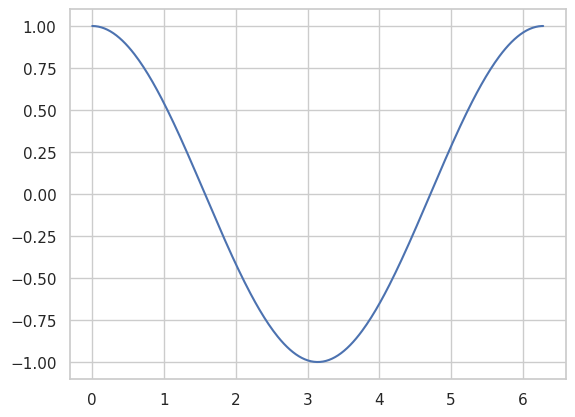

In [176]:
# Set up (x, y) pairs from 0 to 2*pi
xs = np.linspace(0, 2 * np.pi, 300)
ys = np.cos(xs)

# plt.plot takes in x-values and y-values and plots them as a line
plt.plot(xs, ys)

`matplotlib` also conveniently has the ability to plot multiple things on the same plot. Just call `plt.plot` multiple times in the same cell:

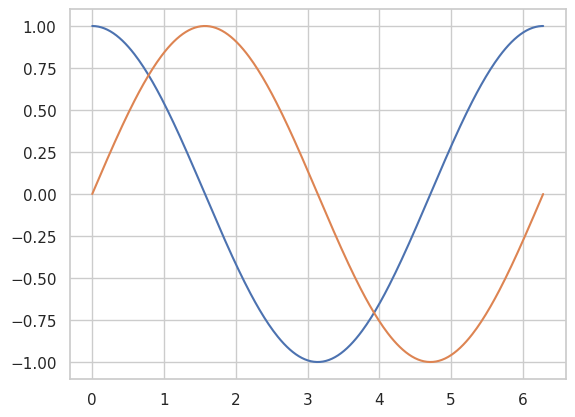

In [177]:
plt.plot(xs, ys)
plt.plot(xs, np.sin(xs))

That plot looks pretty nice but isn't presentation-ready. Luckily, `matplotlib` has a wide array of plot customizations.

<img src="http://today.uic.edu/wp-content/uploads/2014/09/5-bike-lane_orange.png" width="50px" align="left" float="left"/>

<br><br><br>

## Q0 (5%):

Skim through the first part of the tutorial at https://github.com/rougier/matplotlib-tutorial to create the plot below. There is a lot of extra information there which we suggest
you read on your own time. For now, just look for what you need to make the plot.



We will plot two functions:
1. $y = cos(4x)$
2. $y = cos(x)$

In the interval: $[-\pi, +\pi]$

Try to replicate the plot in the picture below using matplotlib customizations as much as possible.

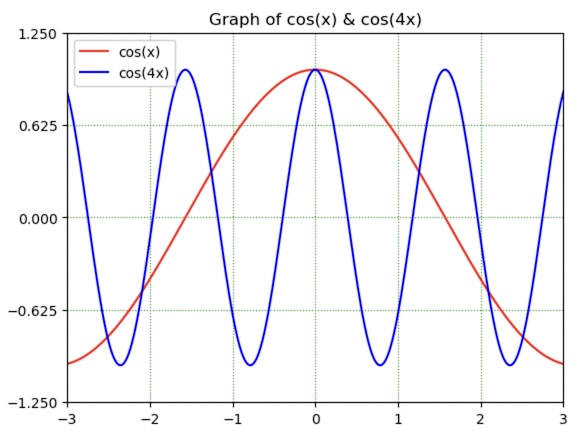

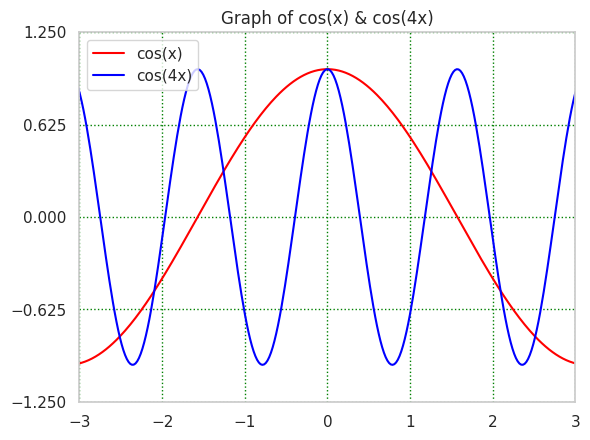

In [178]:
# We have already created the x values for you:
xs = np.linspace(-np.pi, np.pi, 300)

# [Your Code Starts Here]

plt.plot(xs, np.cos(xs), label="cos(x)", color="red")
plt.plot(xs, np.cos(4*xs), label = "cos(4x)", color="blue")
plt.title('Graph of cos(x) & cos(4x)')
plt.yticks([-1.25, -0.625, 0, 0.625, 1.25])
plt.xlim([-3, 3])
plt.legend(loc='upper left')
plt.grid(True, which='both', color='green', linestyle=':')
plt.show()


# [Your Code Ends Here]


# Part 1: Guided EDA of bikeshare trips (40%)

You will be performing some basic EDA (exploratory data analysis) on some Divvy trip data

The variables in this data frame are defined as:

- `ride_id`: Index of ride -- uniquely identifies each ride
- `rideable_type`: Type of bike used for ride (`electric_bike`/`classic_bike`/`docked_bike`)
- `started_at`: Date and time at the start of the ride
- `ended_at` : Date and time at the end of the ride
- `start_station_name`: Name of source station
- `start_station_id`: Id of source station
- `end_station_name`: Name of destination station
- `end_station_id`: Id of destination station
- `start_lat`: Latitude at the start of the ride
- `start_long`: Longitude at the start of the ride
- `end_lat`: Latitude at the end of the ride
- `end_long`: Longitude at the end of the ride
- `member_casual`: Type of rider (`member`-- with a divvy membership/`casual`)

The dataframe is stored in .csv called 'divvy_data.csv' which has been provided to you with this homework. In the following code cell, we read the .csv into `bike_trips`, and fix the data types for columns `started_at` and `ended_at`. Feel free to perform more data cleaning and preparation before proceeding with the rest of the homework. Add your code to the following code cell.

In [179]:
# Reading the .csv into a dataframe:
bike_trips = pd.read_csv('divvy_data.csv', usecols = ["rideable_type", 'started_at', 'ended_at', 'start_station_name', 'start_station_id',
                                                      'end_station_name', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
                                                      'member_casual'])


bike_trips['started_at'] = pd.to_datetime(bike_trips['started_at'], format='%Y-%m-%d %H:%M:%S')
bike_trips['ended_at'] = pd.to_datetime(bike_trips['ended_at'], format='%Y-%m-%d %H:%M:%S')

# More data cleaning code here (optional)
bike_trips=bike_trips.drop(columns='start_lng')
bike_trips=bike_trips.drop(columns='start_lat')
bike_trips=bike_trips.drop(columns='end_lat')
bike_trips=bike_trips.drop(columns='end_lng')
bike_trips=bike_trips.drop(columns='end_station_name')
bike_trips=bike_trips.drop(columns='end_station_id')
bike_trips.drop_duplicates(inplace=True)
bike_trips.reset_index(drop=True,inplace=True)

bike_trips.head()

,rideable_type,started_at,ended_at,start_station_name,start_station_id,member_casual
0,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,member
1,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,member
2,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,member
3,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,member
4,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,casual


<img src="http://today.uic.edu/wp-content/uploads/2014/09/5-bike-lane_orange.png" width="50px" align="left" float="left"/>

<br><br><br>

## Q1.1 (8%):
Explore the `bike_trips` dataframe to answer the following questions.

What is the data granularity?
What time range is represented here? Write code in the cell below to perform your exploration.

In [180]:
# [Your Code Starts Here]

bike_trips['started_at'] = pd.to_datetime(bike_trips['started_at'])
bike_trips['ended_at'] = pd.to_datetime(bike_trips['ended_at'])
time_range = bike_trips['started_at'].agg(['min', 'max'])
print(f"Time Range:\n{time_range}")


# [Your Code Ends Here]

Time Range:
min   2021-01-01 00:02:05
max   2021-02-28 23:59:41
Name: started_at, dtype: datetime64[ns]


Data granularity defines how fine the data is in the dataset.It describes the precision in a dataset or how detailed each data point is in the dataset.In the current dataset, the start and end dates are recorded very precisely using the date and time stamp(minutes, hours and seconds). This says that the fields are very granular.

## Using `pandas` to plot

`pandas` provides useful methods on dataframes. For simple plots, we prefer to
just use those methods instead of the `matplotlib` methods since we're often
working with dataframes anyway. The syntax is:

    dataframe.plot.<plotfunc>

Where the `<plotfunc>` is one of the functions listed under _Plotting_ here: https://pandas.pydata.org/pandas-docs/stable/reference/frame.html

Here we will plot the total number of rides vs. the start date. You may have noticed that our `bike_trips` dataframe has an entry for each ride, i.e. there are 100s-1000s of records corresponding to any given start date (represented by the datetime column `started_at`). To make things easier, we will group the records by the start date, and use the .count() aggregate function to count the number rides started on each specific date. We will use the resulting dataframe with the `dataframe.plot.line()` function to plot the desired graph.

It will be helpful in this homework to familiarize yourself with pandas [groupby()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) as we will need to similarly prepare our `bike_trips` for the upcoming plots.

<a id='processing_cell' > </a>

In [181]:
# This plot shows the number of rides against the start date)
rides_per_day = bike_trips.groupby(by=bike_trips['started_at'].dt.date).size().reset_index()
rides_per_day = rides_per_day.rename(columns={0:'count'})

rides_per_day

,started_at,count
0,2021-01-01,1068
1,2021-01-02,2275
2,2021-01-03,2383
3,2021-01-04,3209
4,2021-01-05,3845
5,2021-01-06,3884
6,2021-01-07,3880
7,2021-01-08,3867
8,2021-01-09,4961
9,2021-01-10,3303


<Axes: xlabel='started_at'>

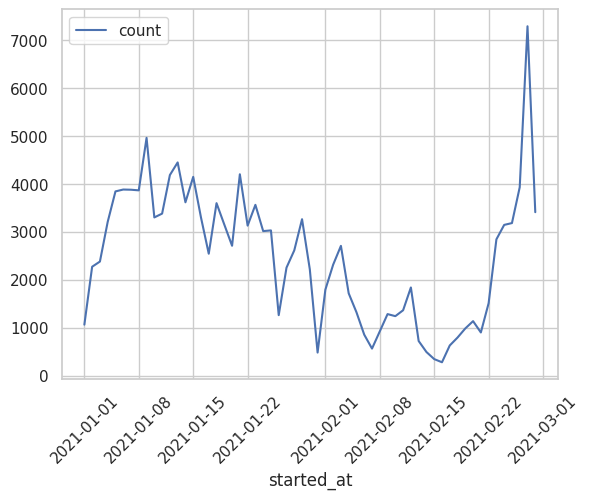

In [182]:
# Now we can use the DataFrame method 'line' to plot
rides_per_day.plot.line(x='started_at', y='count', rot=45)
# NOTE: `rot=45` is used to rotate our xticks to a specified angle in case they're too wide to fit our plot, like in this case.

## `seaborn`

Now, we'll learn how to use the [`seaborn`][sns] Python library. `seaborn`
is built on top of `matplotlib` and provides many helpful functions
for statistical plotting that `matplotlib` and `pandas` don't have.

Generally speaking, we'll use `seaborn` for more complex statistical plots,
`pandas` for simple plots (eg. line / scatter plots), and
`matplotlib` for plot customization.

Nearly all `seaborn` functions are designed to operate on `pandas`
dataframes. Most of these functions assume that the dataframe is in
a specific format called *long-form*, where each column of the dataframe
is a particular feature and each row of the dataframe a single datapoint.

For example, this dataframe is long-form:

```
   country year avgtemp
 1  Sweden 1994       6
 2 Denmark 1994       6
 3  Norway 1994       3
 4  Sweden 1995       5
 5 Denmark 1995       8
 6  Norway 1995      11
 7  Sweden 1996       7
 8 Denmark 1996       8
 9  Norway 1996       7
```

But this dataframe of the same data is not:

```
   country avgtemp.1994 avgtemp.1995 avgtemp.1996
 1  Sweden            6            5            7
 2 Denmark            6            8            8
 3  Norway            3           11            7
```

Note that the `bike_trips` dataframe is long-form.

For more about long-form data, see https://stanford.edu/~ejdemyr/r-tutorials/wide-and-long.
For now, just remember that we typically prefer long-form data and it makes plotting using
`seaborn` easy as well.

[sns]: http://seaborn.pydata.org/index.html

We can create the same plot as the `dataframe.plot` above using the following `seaborn` function: `sns.lineplot`. Notice that instead of calling the plot function on dataframe object, here we pass it as a parameter to the function:

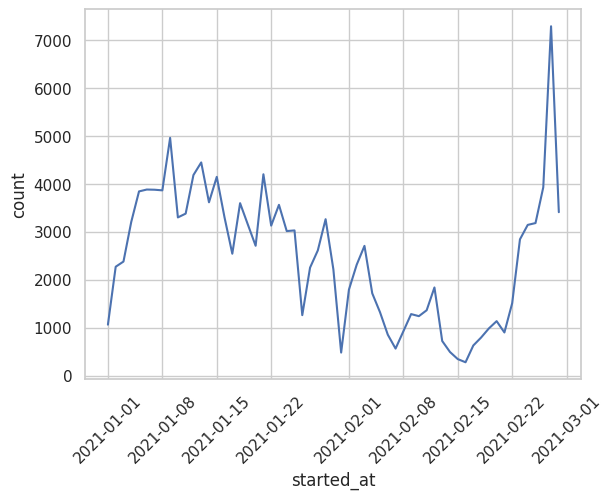

In [183]:
# You can create a plot similar to the one above using the following seaborn syntax
# Note that the seaborn plot is a bit different and requires some customizations (more on this later)
axs = sns.lineplot(x="started_at", y="count", data=rides_per_day)
axs.tick_params(axis='x', rotation=45)

Each plotting function in `seaborn` returns a `matplotlib.axes.Axes` object that has methods that we can utilize to customize our plot at the `matplotlib` level. Here, we use `axs.tick_params()` to customize our xticks to be displayed at an angle of 45 degrees, just like we did using the `rot` argument with the `dataframe.plot.line()` function earlier.

<img src="http://today.uic.edu/wp-content/uploads/2014/09/5-bike-lane_orange.png" width="50px" align="left" float="left"/>

<br><br><br>

## Q1.2 (8%):

Use seaborn's `barplot` function to make a bar chart showing the average
number of rides **started** by `member`s in the:
1. Morning (5:00 AM - 11:59 AM)
2. Afternoon (12:00 PM - 04:59 PM)
3. Evening (5:00 PM - 8:59 PM)
4. Night (9:00 PM - 4:59 AM)

Here's a link to the seaborn API: http://seaborn.pydata.org/api.html

See if you can figure it out by reading the docs.

What trends do you notice? What do you suppose causes these trends?

Notice that `barplot` draws error bars for each category. It uses bootstrapping to make those.

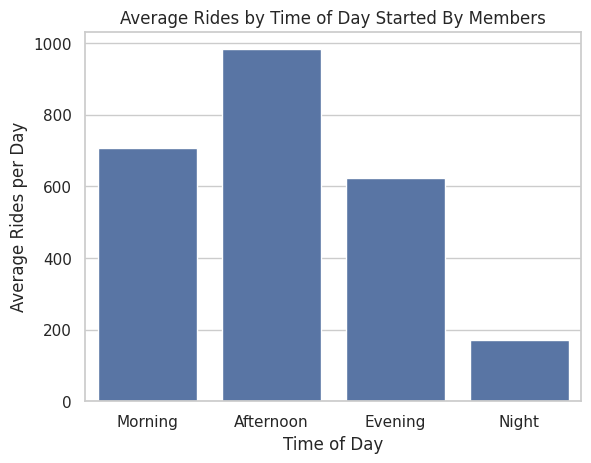

In [184]:
# [Your Code Starts Here]
bike_trips['started_hour'] = bike_trips['started_at'].dt.hour
bike_trips['by_date'] = bike_trips['started_at'].dt.date
member_count=bike_trips[bike_trips['member_casual']=='member']
ride_count=member_count.groupby(by=bike_trips['started_hour']).size().reset_index()

def get_rides_by_hour(hour):
  if 5<=hour<12:
    return 'Morning'
  elif 12<=hour<17:
    return 'Afternoon'
  elif 17<=hour<21:
    return 'Evening'
  else:
    return 'Night'

bike_trips['time']=bike_trips['started_hour'].apply(get_rides_by_hour)
rides_by_hour = bike_trips.groupby(by=bike_trips['time']).size().reset_index(name='total_rides')
days=member_count['by_date'].unique()
rides_by_hour['avg_rides_per_day']= rides_by_hour['total_rides']/len(days)

time_order = ['Morning', 'Afternoon', 'Evening', 'Night']

sns.barplot(x='time', y='avg_rides_per_day', data=rides_by_hour, order=time_order)
plt.title('Average Rides by Time of Day Started By Members')
plt.xlabel('Time of Day')
plt.ylabel('Average Rides per Day')
plt.show()
# [Your Code Ends Here]

**(Your Q1.2 answer here)**

Observations:
1. We can observe that the highest number of average rides
per day amoung the members are during the afternoon, suggesting that members prefer bikes for travel during this time.
2. Morning times are the second most significant times when the members prefer divvy rides. This might be because the members use the bikes to travel for work or physical fitness or any other morning activities.
3. The evening rides drop when compared to the afternoon. This might be because of the reduced availability of bikes, or maybe because of traffic scenario, members prefer other modes of tranport or maybe riders are not interested to ride when it dark during the evenings.
4. The night is when least number of rides are taken. This might be because of safety reasons or people prefer other modes of transport((for example, those who return from work are too tired to take the divvy ride and prefer cabs/busses/metro over divvy rides)).





<img src="http://today.uic.edu/wp-content/uploads/2014/09/5-bike-lane_orange.png" width="50px" align="left" float="left"/>

<br><br><br>

## Q1.3 (8%):

Now for a fancier plot that `seaborn` makes really easy to produce.

We want to visualize the distribution of total number of divvy rides by `member`s on any given day from our `bike_trips` dataframe. You will need to process the dataframe a bit to get this information, similar to what we did at the beginning of code cell [14](#processing_cell).

Use the `displot` function to plot a histogram of the obtained counts. Can you fit a curve to the histogram using `seaborn`? You just need to tune `kde` and `stat` paramaters to the `displot` function. Fancy!

Text(0.5, 1.0, 'Distribution of total number of divvy rides by members')

<Figure size 1200x800 with 0 Axes>

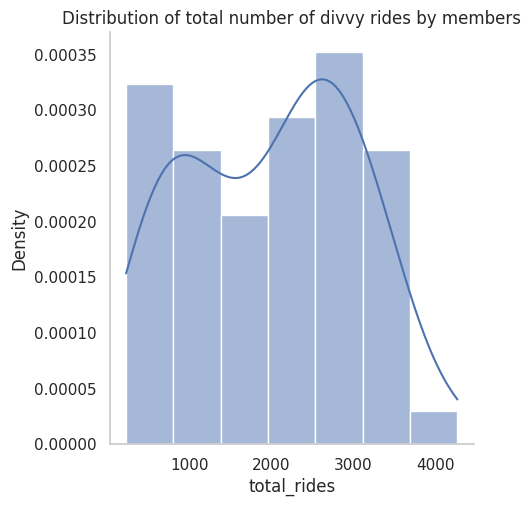

In [200]:
# [Your Code Starts Here]
bike_trips['by_date'] = bike_trips['started_at'].dt.date
member_count=bike_trips[bike_trips['member_casual']=='member']
member_count=member_count.groupby('by_date').size().reset_index(name='total_rides')
plt.figure(figsize=(12, 8))
sns.displot(data=member_count, x='total_rides', kde=True, stat='density')
plt.grid(False)
plt.title('Distribution of total number of divvy rides by members')

# [Your Code Ends Here]

<img src="http://today.uic.edu/wp-content/uploads/2014/09/5-bike-lane_orange.png" width="50px" align="left" float="left"/>

<br><br><br>

## Q1.4 (8%):

Use `seaborn` to make side-by-side boxplots of total `electric_bike`, `classic_bike`, and `docked_bike` rides **started** on any given day in the dataframe. Process the dataframe just like we did in the previous question to derive counts for the three bike categories corresponding to each start date in the dataframe.

Then use the `sns.boxplot` plotting function to plot the obtained ride counts against the bike type or `rideable_type`. Outliers might make the plot harder to read. Set the y-axis scale to be logarithmic to mitigate this issue.

That’s a plot customization so you’ll use the `matplotlib.axes.Axes` object returned by your call to the plotting function. Use the `set_yscale` method with the argument 'log'. Use the same Axes object to similarly set the label for the two axes with the `set_ylabel` and `set_xlabel` methods.

Once you make the plot, you'll notice that both boxplots have the same color. Use the `hue` parameter to the `boxplot` function to fix this.



The result (after customization) should look like:

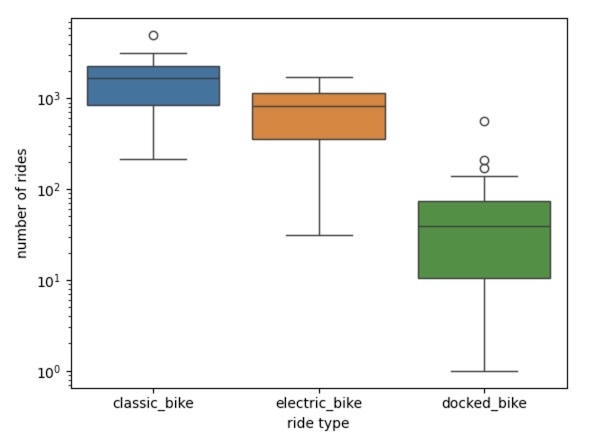

Revisiting Q1.1 on data granularity, what is more suitable text for `ylabel` than `number of riders`?

The more suitable y label would be "number of rides".this is because we are counting individual rides for a particular bike type and not number of riders. hence "number of rides" would be more appropriate than "number of riders"

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

Text(0.5, 0, 'ride type')

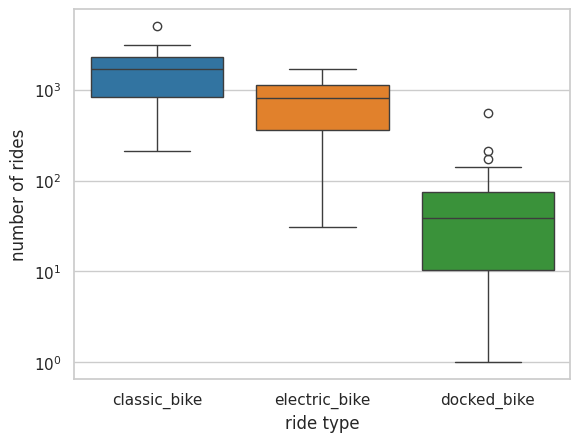

In [186]:
# [Your Code Starts Here]
bike_trips['by_date'] = bike_trips['started_at'].dt.date
electric_rides=bike_trips[bike_trips['rideable_type']=='electric_bike'].groupby('by_date').size()
classic_rides=bike_trips[bike_trips['rideable_type']=='classic_bike'].groupby('by_date').size()
docked_rides=bike_trips[bike_trips['rideable_type']=='docked_bike'].groupby('by_date').size()
data_rides=pd.DataFrame({
    'electric_bike': electric_rides,
    'classic_bike': classic_rides,
    'docked_bike': docked_rides
})
o=['classic_bike', 'electric_bike', 'docked_bike']
color = {'classic_bike': '#1f77b4', 'electric_bike': '#ff7f0e', 'docked_bike': '#2ca02c'}

ax=sns.boxplot(data=data_rides, order=o, palette=color)
ax.set_yscale('log')
ax.set_ylabel('number of rides')
ax.set_xlabel('ride type')


# [Your Code Ends Here]

<img src="http://today.uic.edu/wp-content/uploads/2014/09/5-bike-lane_orange.png" width="50px" align="left" float="left"/>

<br><br><br>

## Q1.5 (8%):

Let's take a look at the number of `member` vs. `casual` riders and how they relate with weekend or weekday start dates.

First, we will use some `.groupby()` magic to obtain the counts of `member` and `casual` rides for each start date along with a weekday/weekend indicator column in a separate dataframe. The counts for each type of rider have already been computed for you and stored in a dataframe `temp_df` along with the start date column `start_date`.

Add a boolean column to `temp_df` called `is_weekday` that has value `True` if the start date is a weekday, and `False` otherwise. Pandas' support for the `datetime` datatype allows obtaining day-of-the-week information using dates very convenient. `Series.dt.day_of_week` allows us to get the day of the week number for any `datetime` series. Click [here](https://datascientyst.com/pandas-datetime-cheat-sheet/) for more info on using datetime in pandas.

Now use the modified `temp_df` with the `lmplot` function to make a scatterplot. Put the number of casual
riders on the y-axis and the number of member riders on the x-axis. Notice that `seaborn` automatically fits a line of best
fit to the plot. Does that line seem to be relevant?

You should note that `lmplot` allows you to pass in `fit_reg=False` to
avoid plotting lines of best fit when you feel they are unnecessary
or misleading.

There seem to be two main groups in the scatterplot. Let's
see if we can separate them out. Use `lmplot` to make the scatterplot again. This time, use the `hue` parameter
to color points for weekday trips differently from weekend trips. You should
get something that looks like:

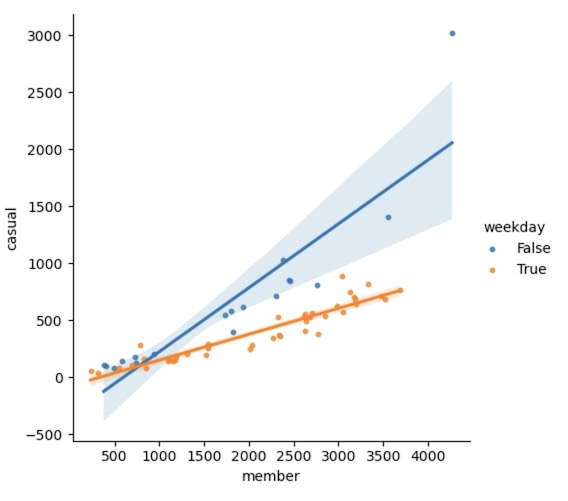

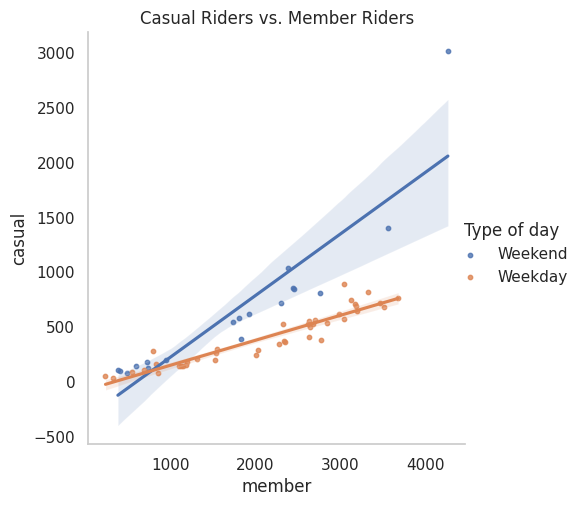

In [187]:

temp_df = bike_trips[['started_at', 'member_casual']].copy()
temp_df['started_at'] = temp_df['started_at'].dt.date
temp_df = temp_df.rename(columns={'started_at':'start_date'})
temp_df['member'] = temp_df['member_casual'] == 'member'
temp_df['casual'] = temp_df['member_casual'] == 'casual'
temp_df = temp_df.drop(columns='member_casual')
temp_df = temp_df.groupby(['start_date']).sum().reset_index()

# [Your Code Starts Here]
temp_df['start_date'] = pd.to_datetime(temp_df['start_date'])
temp_df['is_weekday'] = temp_df['start_date'].dt.day_of_week < 5
# sns.lmplot(x='member', y='casual', data=temp_df)
# plt.title('Scatterplot of Casual Riders vs. Member Riders with Line of Best Fit')
ax=sns.lmplot(x='member', y='casual', data=temp_df, fit_reg=True, hue='is_weekday', scatter_kws={'s': 10}, legend=True)
legendobj=ax.legend
legendobj.set_title('Type of day')
legendobj.get_texts()[0].set_text('Weekend')
legendobj.get_texts()[1].set_text('Weekday')
plt.title('Casual Riders vs. Member Riders')
plt.grid(False)
plt.show()

# [Your Code Ends Here]


# In your plot, you'll notice that your points are larger than ours. That's
# fine. If you'd like them to be smaller, you can add scatter_kws={'s': 10}
# to your lmplot call. That tells the underlying matplotlib scatter function
# to change the size of the points.

# Note that the legend for workingday isn't super helpful.
# Try fixing the legend to be more descriptive.
# HINT: ax = sns.lmplot(..., legend=True)
# legendObj = ax.legend # Modify this object

## Want to learn more?

We recommend checking out the `seaborn` tutorials on your own time. http://seaborn.pydata.org/tutorial.html

The `matplotlib` tutorial we linked in Question 1 is also a great refresher on common `matplotlib` functions: https://www.labri.fr/perso/nrougier/teaching/matplotlib/

Here's a great blog post about the differences between Python's visualization libraries:
https://dansaber.wordpress.com/2016/10/02/a-dramatic-tour-through-pythons-data-visualization-landscape-including-ggplot-and-altair/


# Part 2: Self-directed EDA of social media and internet attitudes (55%)

The last part is intentionally more open-ended and will be graded on the completeness of the plot(s) produced and the insights you gain from them.  The goal here is for you to thoroughly explore a dataset on attitudes towards the internet and whether it's good for society.

_Question 2.0_ is asking you to look at a given visualization and reverse engineer the code that created it. _Question 2.1_ is about _data exploration visualization_ while the other questions are about _data presentation visualization_. Report your three most significant findings (_Q2.2, Q2.3, and Q2.4_). Each finding should have a _visualization headline_  which highlights the main takeaway in 5-15 words, an informative visualization that supports your finding and a _visualization description_, 100-150 words per finding explaining your assumptions and what you have found. For example, the visualization headline could be "_Majority of high frequency internet users visit these social networks_" with the following bar plot visualization:  

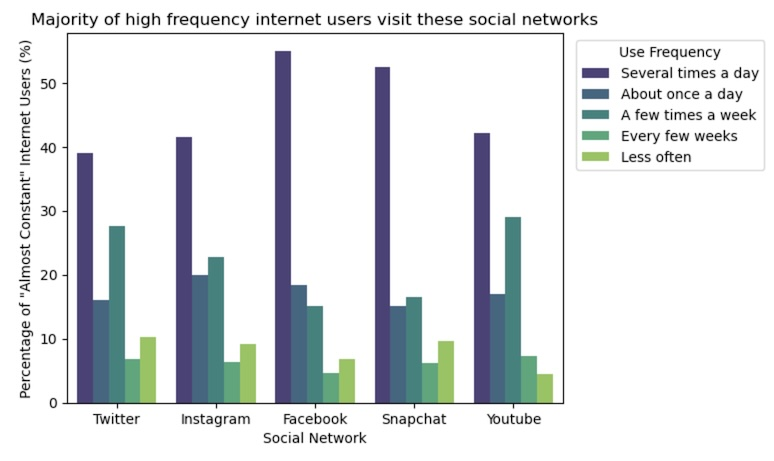

The survey data that you will analyze was collected by Pew Research. In order to access it, you need to create an account and download it from [here](https://www.pewresearch.org/dataset/2021-core-trends-survey/) (click on "Download Dataset" in upper right corner). The file you will work with is `Jan 25-Feb 8, 2021 - Core Trends Survey - CSV.csv`. The file that contains information about the meaning of each feature is `Jan 25-Feb 8, 2021 - Core Trends Survey - Questionnaire.docx`.


Be sure to consider transformations, subsets, correlations, reference markers, and lines/curves-of-best-fit (as covered in Chapter 6 of PTDS) to reveal the relationship that you are wanting to learn more about.  Also be sure to make plots that are appropriate for the variable types.  For completeness, be explicit about any assumptions you make in your analysis.  An exemplary plot will have:

* A title
* Labelled and appropriately scaled axes
* A legend, if applicable
* A carefully selected color scheme
* A main point, accentuated through design choices




## Q2.0 (5%): Reverse Engineer

Your first step is to load the data from `Jan 25-Feb 8, 2021 - Core Trends Survey - CSV.csv`, and understand what is stored in it. Read the  the survey questionnaire in `Jan 25-Feb 8, 2021 - Core Trends Survey - Questionnaire.docx` to understand the meaning of each feature. Your assignment is to replicate the bar plot visualization shown above. Notice the labels on x and y axes as well as the legend of the plot to determine the information needed to construct the plot.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

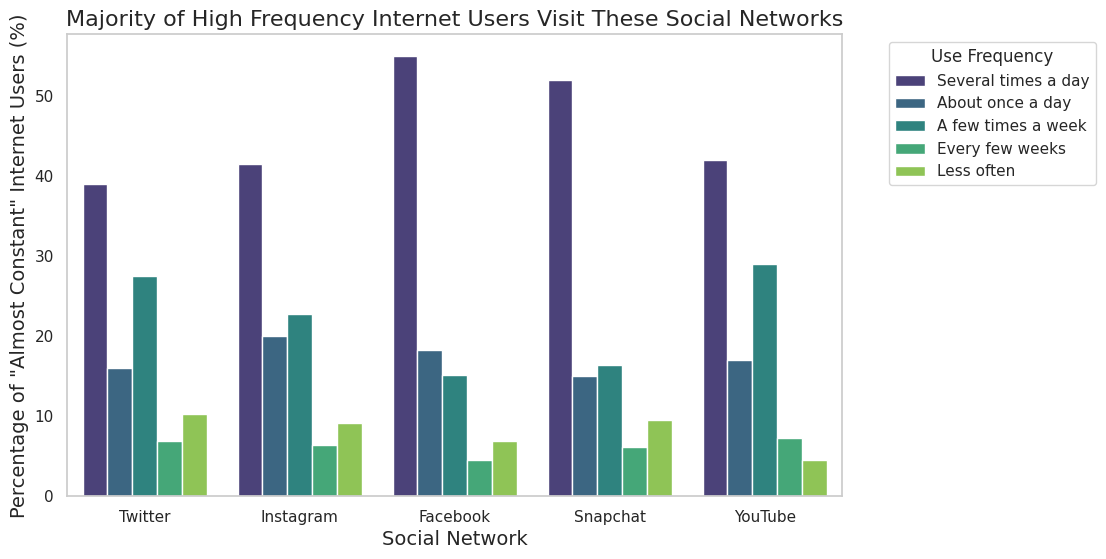

In [188]:
# [Your Code Starts Here]

data=pd.read_csv('Jan 25-Feb 8, 2021 - Core Trends Survey - CSV.csv')
social_media_cols = ['sns2a', 'sns2b', 'sns2c', 'sns2d', 'sns2e']

high_freq = data[data['intfreq'] == str(1)]

long_data = pd.melt(high_freq, id_vars=['respid'], value_vars=social_media_cols,
                     var_name='SocialMedia', value_name='Frequency')

long_data = long_data[long_data['Frequency'] > str(0)]

long_data['SocialMedia'] = long_data['SocialMedia'].replace({
    'sns2a': 'Twitter',
    'sns2b': 'Instagram',
    'sns2c': 'Facebook',
    'sns2d': 'Snapchat',
    'sns2e': 'YouTube'
})

social_counts = long_data.groupby(['SocialMedia', 'Frequency']).size().reset_index(name='Counts')
total_counts = social_counts.groupby('SocialMedia')['Counts'].sum().reset_index(name='Total')

merged_counts = pd.merge(social_counts, total_counts, on='SocialMedia')
merged_counts['Percentage'] = (merged_counts['Counts'] / merged_counts['Total']) * 100

frequency_map = {
    '1': 'Several times a day',
    '2': 'About once a day',
    '3': 'A few times a week',
    '4': 'Every few weeks',
    '5': 'Less often'
}
merged_counts['Frequency'] = merged_counts['Frequency'].map(frequency_map)

plt.figure(figsize=(10, 6))
sns.barplot(x='SocialMedia', y='Percentage', hue='Frequency', data=merged_counts,
            palette='viridis', order=['Twitter', 'Instagram', 'Facebook', 'Snapchat', 'YouTube'])

plt.title('Majority of High Frequency Internet Users Visit These Social Networks', fontsize=16)
plt.xlabel('Social Network', fontsize=14)
plt.ylabel('Percentage of "Almost Constant" Internet Users (%)', fontsize=14)
plt.grid(False)
plt.legend(title='Use Frequency', bbox_to_anchor=(1.05, 1))


#HINTS
# 1) Read your dataframe with pandas
# 2) Identify what colums are used for plot above
# 3) Filter required rows and columns necessary for plotting above figure
# 4) Your dataframe is in wide_format. You need to convert to long_format. See pandas.melt documentation
# i.e. originally there is a column each for these five social medias. The column name should be value for a new column.
# 5) Once dataframe is in wide format, filter individuals who responded to the survey
# 6) Use pandas aggregation after groupby to calculate percentage of responses for each social media
# 7) Use seaborn barplot to plot the figure above. Customize with color palette='viridis'
# 8) Add descriptive xlabel, ylabel, and title
# 9) Customize legend if necessary



<img src="http://today.uic.edu/wp-content/uploads/2014/09/5-bike-lane_orange.png" width="50px" align="left" float="left"/>

<br><br><br>

## Q2.1 (5%): Initial exploration

Run descriptive statistics on the data by considering the EDA key data properties we covered in class. Write a 100-150 word description of your findings. Based on these statistics or other ideas you have, form hypotheses that guide your EDA and visualizations for the last three questions. You need to show at least one visualization but you are welcome to show more.

In [189]:
# Run descriptive statistics on the data and develop ideas on what to explore

# [Your Code Starts Here]
print("----------------------------info---------------------------")
print(df.info())
print("----------------------------describe---------------------------")
print(df.describe())


# [Your Code Ends Here]

----------------------------info---------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 90 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   respid             1502 non-null   int64  
 1   sample             1502 non-null   int64  
 2   comp               1502 non-null   int64  
 3   int_date           1502 non-null   object 
 4   lang               1502 non-null   int64  
 5   state              1502 non-null   int64  
 6   density            1502 non-null   int64  
 7   usr                1502 non-null   object 
 8   qs1                1502 non-null   object 
 9   sex                1502 non-null   int64  
 10  eminuse            1502 non-null   int64  
 11  intmob             1502 non-null   int64  
 12  intfreq            1502 non-null   object 
 13  snsint2            1502 non-null   int64  
 14  home4nw            1502 non-null   int64  
 15  bbhome1     

In [190]:
print("\n--- Missing Values---\n")
print(df.isnull().sum())


--- Missing Values---

respid        0
sample        0
comp          0
int_date      0
lang          0
             ..
ql1a          0
qc1           0
weight        0
cellweight    0
Education     0
Length: 90, dtype: int64


In [191]:
total_responders = df["respid"].count()
print("Total responders: ", total_responders)

df_males = df[df["sex"] == 1]
male_count = df_males["respid"].count()
male_percentage = (male_count / total_responders) * 100
print("Number of male responders:", male_count)
print("Percentage of male responders:", male_percentage)

df_females = df[df["sex"] == 2]
female_count = df_females["respid"].count()
female_percentage = (female_count / total_responders) * 100
print("Number of female responders: ", female_count)
print("Percentage of female responders:", female_percentage)

mean_age = df["age"].mean()

Total responders:  1502
Number of male responders: 865
Percentage of male responders: 57.58988015978696
Number of female responders:  637
Percentage of female responders: 42.41011984021305


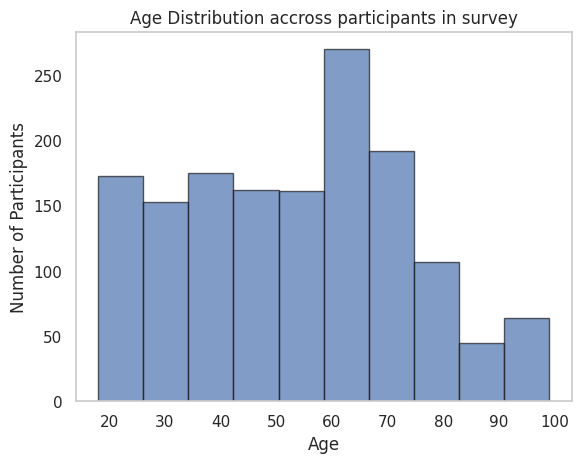

In [202]:
#exploring the distribution age groups accross the participants in the survey
plt.hist(df['age'],edgecolor='k',alpha=0.7)
plt.title('Age Distribution accross participants in survey')
plt.xlabel('Age')
plt.ylabel('Number of Participants')
plt.grid(False)
plt.show()

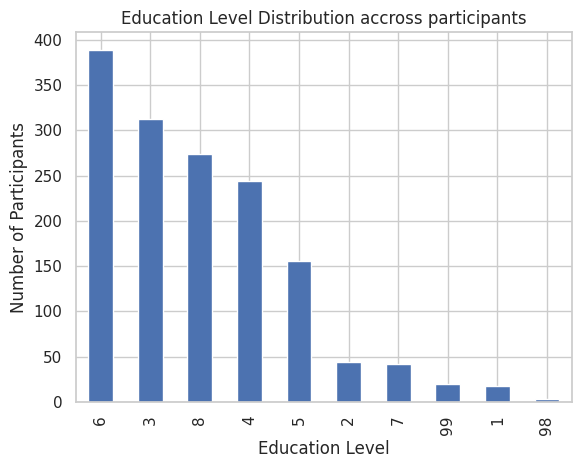

In [193]:
#exploring education level people participated in the survey
df['educ2'].value_counts().plot(kind='bar')
plt.title('Education Level Distribution accross participants')
plt.xlabel('Education Level')
plt.ylabel('Number of Participants')

plt.show()

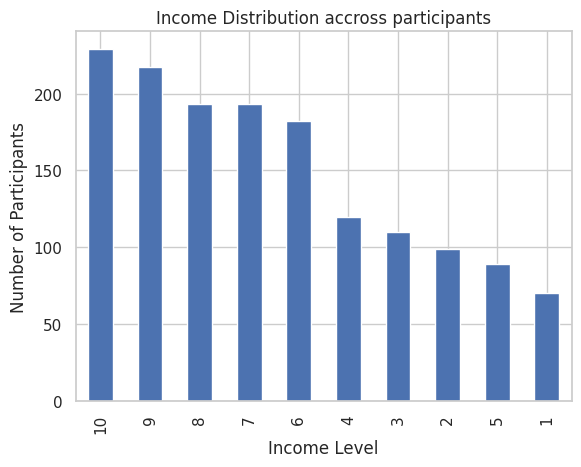

In [194]:
#exploring income distribution of participants
df['income'].value_counts().plot(kind='bar')
plt.title('Income Distribution accross participants')
plt.xlabel('Income Level')
plt.ylabel('Number of Participants')
plt.show()

<ipython-input-195-7ace32b1813e>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Education", y="age", data=mean_age_per_edu, palette="viridis")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When g

[Text(0, 0, "Bachelor's degree"),
 Text(1, 0, "Don't know"),
 Text(2, 0, 'High school graduate'),
 Text(3, 0, 'High school incomplete'),
 Text(4, 0, 'Less than high school'),
 Text(5, 0, 'Postgrad/professional degree'),
 Text(6, 0, 'Refused'),
 Text(7, 0, 'Some college, no degree'),
 Text(8, 0, 'Some postgrad/professional'),
 Text(9, 0, 'Two-year associate degree')]

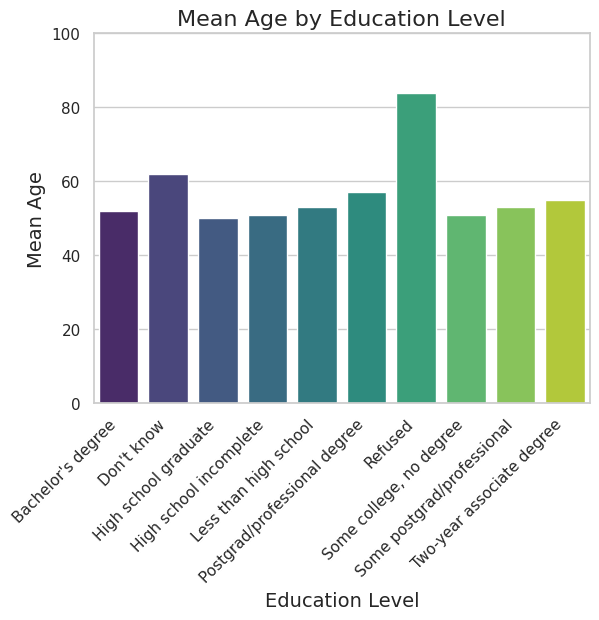

In [195]:
# Create one or more visualizations
#Visualization 1
edu_labels = {
    1: "Less than high school",
    2: "High school incomplete",
    3: "High school graduate",
    4: "Some college, no degree",
    5: "Two-year associate degree",
    6: "Bachelor's degree",
    7: "Some postgrad/professional",
    8: "Postgrad/professional degree",
    98: "Don't know",
    99: "Refused"
}
df["Education"] = df["educ2"].replace(edu_labels)
mean_age_per_edu = df.groupby('Education')['age'].mean().reset_index()
mean_age_per_edu['age'] = mean_age_per_edu['age'].astype(int)
ax = sns.barplot(x="Education", y="age", data=mean_age_per_edu, palette="viridis")
ax.set_title('Mean Age by Education Level', fontsize=16)
ax.set_xlabel('Education Level', fontsize=14)
ax.set_ylabel('Mean Age', fontsize=14)
ax.set_ylim([0, 100])
ax.set_xticklabels(mean_age_per_edu['Education'], rotation=45, ha='right')

# [Your Code Ends Here]

<ipython-input-196-e7a06a3f7405>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Platform', y='Usage', data=social_media_df, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: 

(0.0, 2686.0)

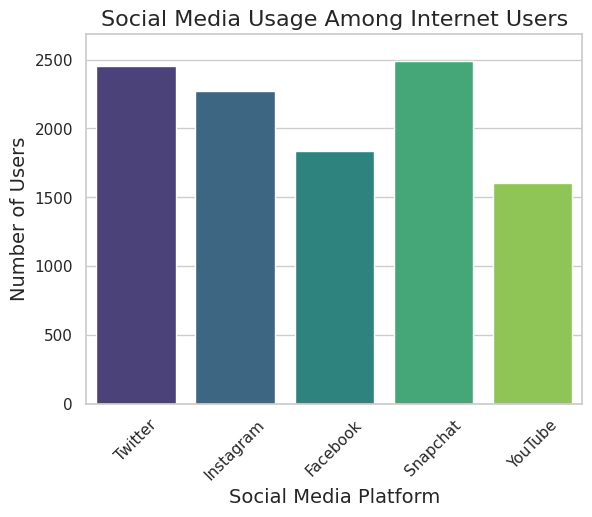

In [196]:
#Visualization 2
# Assuming 'eminuse' indicates internet usage (1 = Yes)
internet_users = df[df['eminuse'] == 1]
social_media_usage = {
    'Twitter': internet_users['web1a'].sum(),
    'Instagram': internet_users['web1b'].sum(),
    'Facebook': internet_users['web1c'].sum(),
    'Snapchat': internet_users['web1d'].sum(),
    'YouTube': internet_users['web1e'].sum()
}

social_media_df = pd.DataFrame(social_media_usage.items(), columns=['Platform', 'Usage'])
bar_plot = sns.barplot(x='Platform', y='Usage', data=social_media_df, palette='viridis')
bar_plot.set_title('Social Media Usage Among Internet Users', fontsize=16)
bar_plot.set_xlabel('Social Media Platform', fontsize=14)
bar_plot.set_ylabel('Number of Users', fontsize=14)
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45)
bar_plot.set_ylim(0, social_media_df['Usage'].max()+200)




Enter your 100-150 word description here.

**Visualization 1:**
The plots illustrate the average age associated with various educational levels, categorized into eight distinct groups, ranging from “less than high school” to “postgrad/professional degree.”Notably, respondents who refused to disclose their education level exhibit the highest mean age of approximately 80 years, suggesting that older individuals may be less willing to share personal information or that attitudes toward education have evolved over generations.There is a noticeable trend where individuals with higher educational attainment, such as a Bachelor's degree, tend to be younger, with a mean age slightly below 60. This suggests that younger generations are increasingly pursuing higher education.Individuals in the "Some college, no degree" category exhibit a mean age around 40, suggesting that many young adults are engaging in higher education but may be facing challenges in completing their degrees.The mean age for high school graduates is slightly above 40, indicating that this group is relatively younger than those with less than high school educational attainment, highlighting a potential generational shift towards valuing education.







**Visualization 2**
The visualization of social media usage among internet users reveals key insights into platform popularity. Twitter emerges as the leading platform with over 2,500 users, indicating its strong engagement for real-time communication. Snapchat and Instagram follow closely in user numbers, suggesting their appeal to younger demographics who favor visual content. Facebook shows moderate engagement, hinting at a potential decline in its popularity among younger users. In contrast, YouTube has the lowest user count, which may reflect its primary role as a content consumption platform rather than a social engagement tool.


<img src="http://today.uic.edu/wp-content/uploads/2014/09/5-bike-lane_orange.png" width="50px" align="left" float="left"/>

<br><br><br>

## Q2.2 (15%): Internet penetration accross age and gender demographics
The aim of this visualization is to analyze the relationship between internet usage frequency, age, and gender, highlighting patterns and differences in online habits across various demographic groups


<ipython-input-197-fbc73a779f64>:47: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  ax=sns.violinplot(
<ipython-input-197-fbc73a779f64>:47: FutureWarning: 

The `scale_hue` parameter has been replaced and will be removed in v0.15.0. Pass `common_norm=True` for the same effect.
  ax=sns.violinplot(
<ipython-input-197-fbc73a779f64>:66: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(frequency_names,rotation=90)


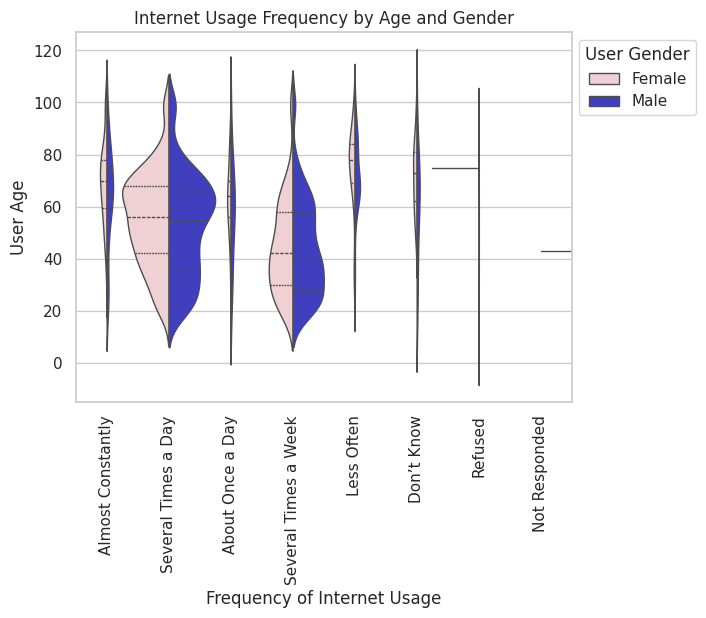

In [197]:
# your Q2.2 visualization code should be included here
# make sure to execute it, so we can see your plot in the submitted pdf
import pandas as pd
import seaborn as sns


data = pd.read_csv('Jan 25-Feb 8, 2021 - Core Trends Survey - CSV.csv')

# Rename columns
column_mapping = {
    'web1a': 'Twitter',
    'web1b': 'Instagram',
    'web1c': 'Facebook',
    'web1d': 'Snapchat',
    'web1e': 'YouTube',
    'age': 'Age',
    'sex': 'Gender',
    'eminuse': 'Internet Usage',
    'intfreq': 'Frequency of Internet Usage',
}
data.rename(columns=column_mapping, inplace=True)

# Map gender labels
gender_map = {
    1: "Male",
    2: "Female"
}
data["Gender"] = data["Gender"].replace(gender_map)

# Map internet frequency labels
frequency_labels = {
    1: "Almost Constantly",
    2: "Several Times a Day",
    3: "About Once a Day",
    4: "Several Times a Week",
    5: "Less Often",
    8: "Don’t Know",
    9: "Refused",
    ' ': "Not Responded"
}
data["Frequency of Internet Usage"] = data["Frequency of Internet Usage"].replace(frequency_labels)

# Set the style
sns.set(style="whitegrid")

# Create the violin plot
ax=sns.violinplot(
    x="Frequency of Internet Usage",
    y="Age",
    hue="Gender",
    data=data,
    split=True,
    inner="quart",
    linewidth=1,
    scale="count",
    scale_hue=False,
    palette={"Male": "blue", "Female": "pink"},
    saturation=0.5,
    width=1.5,
    )

ax.set_title("Internet Usage Frequency by Age and Gender")
ax.set_xlabel("Frequency of Internet Usage")
ax.set_ylabel("User Age")
frequency_names = list(frequency_labels.values())
ax.set_xticklabels(frequency_names,rotation=90)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title='User Gender')





# [Your Code Starts Here]

The visualization demonstrates clear patterns of internet usage based on age and gender. Younger individuals, particularly males, are more frequent users, with many using the internet "almost constantly" or "several times a day." As age increases, internet usage frequency declines, with middle-aged users showing balanced daily usage, while older users (60+) tend to use the internet less frequently, mostly "once a day" or "several times a week." Notably, older women show slightly higher engagement compared to men in these lower-frequency categories. Overall, the data indicates a strong correlation between age, gender, and internet usage patterns.

<img src="http://today.uic.edu/wp-content/uploads/2014/09/5-bike-lane_orange.png" width="50px" align="left" float="left"/>

<br><br><br>

## Q2.3 (15%): Social Media Engagement Across Educational Backgrounds

The aim of this visualization is to examine the preferences for social media platforms among users with varying levels of education, highlighting trends and differences in engagement.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

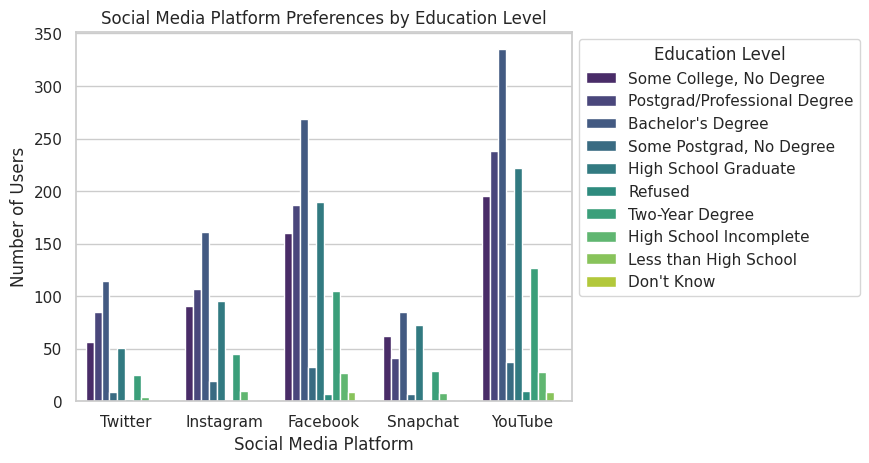

In [198]:
# your Q2.3 visualization code should be included here
# make sure to execute it, so we can see your plot in the submitted pdf

# [Your Code Starts Here]
data = pd.read_csv('Jan 25-Feb 8, 2021 - Core Trends Survey - CSV.csv')


column_mapping = {
    'web1a': 'Twitter',
    'web1b': 'Instagram',
    'web1c': 'Facebook',
    'web1d': 'Snapchat',
    'web1e': 'YouTube',
    'educ2': 'Education Level'
}
data.rename(columns=column_mapping, inplace=True)
education_labels = {
    1: "Less than High School",
    2: "High School Incomplete",
    3: "High School Graduate",
    4: "Some College, No Degree",
    5: "Two-Year Degree",
    6: "Bachelor's Degree",
    7: "Some Postgrad, No Degree",
    8: "Postgrad/Professional Degree",
    98: "Don't Know",
    99: "Refused"
}
data["Education Level"] = data["Education Level"].replace(education_labels)

social_media_columns = ['Twitter', 'Instagram', 'Facebook', 'Snapchat', 'YouTube']
data_melted = data.melt(id_vars=['Education Level'], value_vars=social_media_columns,
                        var_name='Social Media Platform', value_name='Usage')

data_melted = data_melted[data_melted['Usage'] == 1]

ax=sns.countplot(x='Social Media Platform', hue='Education Level', data=data_melted, palette='viridis')

ax.set_title('Social Media Platform Preferences by Education Level')
ax.set_xlabel('Social Media Platform')
ax.set_ylabel('Number of Users')
ax.legend(title='Education Level', bbox_to_anchor=(1, 1), loc='upper left')


# [Your Code Ends Here]

This visualization illustrates how social media platform preferences vary by education level. YouTube emerges as the most popular platform across all educational backgrounds, with particularly high usage among those with "Some College, No Degree" and "Bachelor’s Degree." Facebook follows closely, showing a strong presence among users with higher educational levels, including postgraduate degrees. Twitter and Instagram are used more evenly across different educational groups, but with smaller user bases compared to YouTube and Facebook. Snapchat sees lower engagement, particularly among individuals with advanced education or incomplete schooling. Interestingly, lower educational levels, such as "Less than High School" or "High School Incomplete," show minimal engagement across most platforms. The "Refused" and "Don't Know" categories are small and have little impact on the overall trends. This suggests that YouTube and Facebook are the most universal platforms, appealing to users across various educational backgrounds, while other platforms cater more selectively.

<img src="http://today.uic.edu/wp-content/uploads/2014/09/5-bike-lane_orange.png" width="50px" align="left" float="left"/>

<br><br><br>

## Q2.4 (15%): Political Leanings by Income Bracket
The aim of this heatmap is to analyze the distribution of political affiliations across various income brackets, highlighting the relationship between economic status and political identity.

Text(43.249999999999986, 0.5, 'Income Level')

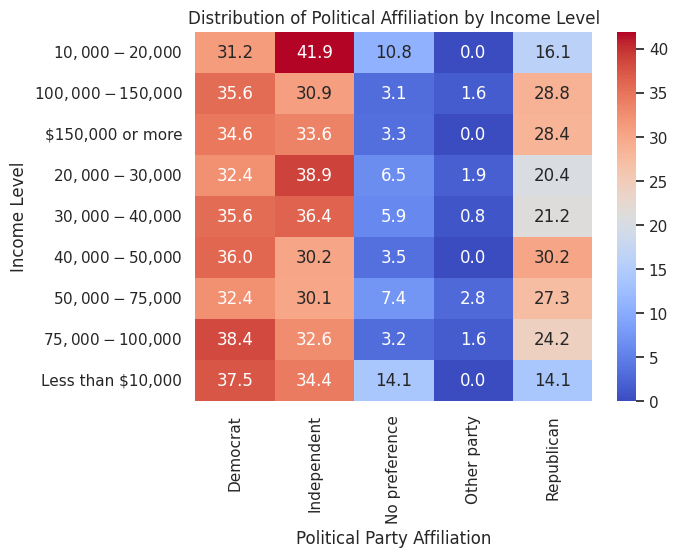

In [199]:
# your Q2.4 visualization code should be included here
# make sure to execute it, so we can see your plot in the submitted pdf

# [Your Code Starts Here]
survey_data = pd.read_csv('Jan 25-Feb 8, 2021 - Core Trends Survey - CSV.csv')

income_bracket_labels = {
    1: 'Less than $10,000',
    2: '$10,000 - $20,000',
    3: '$20,000 - $30,000',
    4: '$30,000 - $40,000',
    5: '$40,000 - $50,000',
    6: '$50,000 - $75,000',
    7: '$75,000 - $100,000',
    8: '$100,000 - $150,000',
    9: '$150,000 or more'
}

political_party_labels = {
    1: 'Republican',
    2: 'Democrat',
    3: 'Independent',
    4: 'No preference',
    5: 'Other party'
}

survey_data['Income Level'] = survey_data['income'].map(income_bracket_labels)
survey_data['Political Party Affiliation'] = survey_data['party'].map(political_party_labels)

income_political_data = pd.crosstab(survey_data['Income Level'], survey_data['Political Party Affiliation'])
income_political_percentage = income_political_data.apply(lambda x: x / x.sum() * 100, axis=1)
heatmap_plot = sns.heatmap(income_political_percentage, annot=True, fmt=".1f", cmap="coolwarm")
heatmap_plot.set_title('Distribution of Political Affiliation by Income Level')
heatmap_plot.set_xlabel('Political Party Affiliation')
heatmap_plot.set_ylabel('Income Level')



# [Your Code Ends Here]

This visualization reveals clear trends and patterns in the relationship between income brackets and political affiliation. A notable trend is the strong Democratic support among lower-income individuals, particularly those earning less than $10,000, where 37.5% identify as Democrats and 14.1% have no preference. As income increases, the percentage of Democrats tends to decline, while Republican affiliation rises. For instance, in the $40,000 to $50,000 bracket, Republican support reaches 30.2%.

The "100,000 to 150,000" income group shows a pivotal shift, with 35.6% identifying as Democrats but a significant 30.9% as Independents. In the highest income category ($150,000 or more), Republican identification peaks at 28.4%, illustrating a clear correlation between higher income and increased Republican affiliation. Overall, the data illustrates a consistent pattern where lower-income individuals lean Democratic, while higher-income groups tend to favor Republican or Independent affiliations, highlighting the impact of economic status on political identity.

# Extra Credit (20%)

The best 10 visualizations and insights from Questions 2.2 to 2.4 will get an extra 20% credit (at most one visualization can be considered per submission). There is nothing you need to do for the extra credit except to do your best in the last three questions. We will showcase the best visualizations in class!

This was the last part of Homework 2. Now you need to submit your work following the instructions in the beginning of the notebook and you are done!